# KNN_Example_2/Project 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\DataSets-master\DataSets-master\Bmi_male_female.csv")

In [3]:
mydata

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
mydata.shape

(500, 4)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
no_male=mydata[mydata["Gender"]=="Male"]

In [7]:
no_male

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
...,...,...,...,...
487,Male,187,80,2
488,Male,198,136,4
494,Male,152,98,5
498,Male,150,95,5


In [8]:
len(no_male)

245

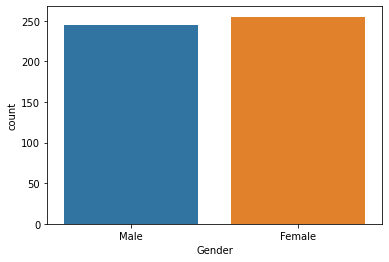

In [9]:
sb.countplot(x="Gender",data=mydata)
plt.show()

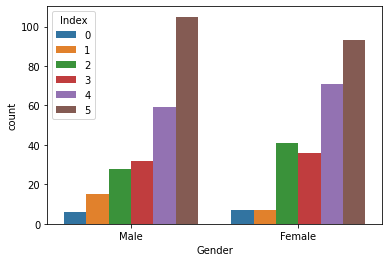

In [10]:
sb.countplot(x="Gender",data=mydata,hue="Index")
plt.show()

#### Data Separation(Input/Features or output/Target)

In [11]:
x_GHW=mydata.iloc[:,:3]

In [12]:
x_GHW

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [13]:
y_Index=mydata.iloc[:,3]

In [14]:
y_Index

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [15]:
type(x_GHW)

pandas.core.frame.DataFrame

In [16]:
type(y_Index)

pandas.core.series.Series

### Encode{ Male:0,Female:1}

In [17]:
x_GHW.Gender=x_GHW.Gender.map({"Male":0,"Female":1})

In [18]:
x_GHW.head(5)

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [19]:
Index_Result=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [20]:
Index_Result

0     Extremely Weak
1               Weak
2             Normal
3         Overweight
4            Obesity
5    Extreme Obesity
dtype: object

### spliting the data into training and testing [70:30]

In [21]:
n=int(len(x_GHW)*0.70)

In [22]:
XA=x_GHW.values
YA=y_Index.values

In [23]:
type(XA)

numpy.ndarray

In [24]:
type(YA)

numpy.ndarray

In [25]:
x_Train=XA[:n]
x_Test=XA[n:]
y_Train=YA[:n]
y_Test=YA[n:]

In [26]:
print("shape of x_train {} and shape of y_train {}".format(x_Train.shape,y_Train.shape))

shape of x_train (350, 3) and shape of y_train (350,)


In [27]:
print("shape of x_test {} and shape of y_test {}".format(x_Test.shape,y_Test.shape))

shape of x_test (150, 3) and shape of y_test (150,)


### Training the model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_Trainer=KNeighborsClassifier(n_neighbors=5)

In [30]:
knn_Learner=knn_Trainer.fit(x_Train,y_Train)

In [31]:
i=knn_Learner.predict([[0,171,52]])
Index_Result[i]

1    Weak
dtype: object

In [32]:
i=knn_Learner.predict([[1,153,40]])
Index_Result[i]

2    Normal
dtype: object

In [33]:
i=knn_Learner.predict([[0,165,80]])
Index_Result[i]

3    Overweight
dtype: object

In [34]:
yact=y_Test
yp=knn_Learner.predict(x_Test)

In [35]:
yactvsyp= pd.DataFrame({"yact":list(yact),"yp":list(yp)})

In [36]:
yactvsyp

,yact,yp
0,2,3
1,2,2
2,2,2
3,5,5
4,0,0
...,...,...
145,5,5
146,4,4
147,5,5
148,5,5


In [37]:
from sklearn.metrics import accuracy_score 

In [38]:
acc=accuracy_score(yp,yact)*100
acc

91.33333333333333

In [39]:
kmax=int(np.sqrt(len(x_Train)))+1
krange=list(range(1,kmax))
krange

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [40]:
acc_list=[]
for i in range(1,kmax):
    knn_Model=KNeighborsClassifier(n_neighbors=i)
    model_learner=knn_Model.fit(x_Train,y_Train)
    ypmodel=model_learner.predict(x_Test)
    model_acc=accuracy_score(yact,ypmodel)
    acc_list.append(model_acc)
    print("Value of k {} and acc is {}".format(i,model_acc))

Value of k 1 and acc is 0.8933333333333333
Value of k 2 and acc is 0.9066666666666666
Value of k 3 and acc is 0.8933333333333333
Value of k 4 and acc is 0.9333333333333333
Value of k 5 and acc is 0.9133333333333333
Value of k 6 and acc is 0.9133333333333333
Value of k 7 and acc is 0.9133333333333333
Value of k 8 and acc is 0.9066666666666666
Value of k 9 and acc is 0.92
Value of k 10 and acc is 0.9066666666666666
Value of k 11 and acc is 0.9
Value of k 12 and acc is 0.92
Value of k 13 and acc is 0.9133333333333333
Value of k 14 and acc is 0.92
Value of k 15 and acc is 0.88
Value of k 16 and acc is 0.8933333333333333
Value of k 17 and acc is 0.8933333333333333
Value of k 18 and acc is 0.9066666666666666


In [41]:
print("acc max",np.array(acc_list).max())
print("k",np.array(acc_list).argmax()+1)

acc max 0.9333333333333333
k 4


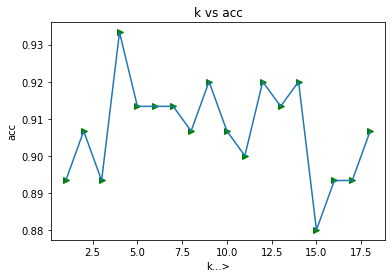

In [42]:
plt.plot(krange,acc_list,'g>')
plt.plot(krange,acc_list)
plt.xlabel("k...>")
plt.ylabel("acc")
plt.title("k vs acc")
plt.show()